# Notebook to find QC on raw data

**Created by :** Srivalli Kolla

**Created on :** 16 April, 2025

**Modified on :** 16 April, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [1]:
import anndata
import logging
import scanpy as sc
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython                      3.0.12
PIL                         11.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        25.1.0
attrs                       25.1.0
babel                       2.17.0
certifi                     2025.01.31
charset_normalizer          3.4.1
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython                      3.0.12
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.12
decorator                   5.2.1
defusedxml                  0.7.1
executing                   2.1.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.13.0
idna                        3.10
igraph                      0.11.8
ipykernel                   6.29.5
ipywidgets                  8.1.5
isoduration               

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/session_info/main.py:213: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  mod_version = _find_version(mod.__version__)


## Read `anndata` objects

In [4]:
adata = sc.read_h5ad('./data/Library2/acm_lib2_concat_raw_16_04_25.h5ad')
adata

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 173725 × 32285
    obs: 'sample'

In [5]:
adata.obs

,sample
AAACCCAAGAGGTCGT-1,B10
AAACCCAAGCACAAAT-1,B10
AAACCCAAGCCGTTAT-1,B10
AAACCCAAGCTCTATG-1,B10
AAACCCAAGCTGGCCT-1,B10
...,...
TTTGTTGTCCCGTTGT-1,B4
TTTGTTGTCCGATCGG-1,B4
TTTGTTGTCTAGAACC-1,B4
TTTGTTGTCTAGGCAT-1,B4


In [6]:
adata.var

""
Xkr4
Gm1992
Gm19938
Gm37381
Rp1
...
AC124606.1
AC133095.2
AC133095.1
AC234645.1


# Data Overview

## Mt and Ribo Genes

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('mt-') 
adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl"))
adata.var

,mt,ribo
Xkr4,False,False
Gm1992,False,False
Gm19938,False,False
Gm37381,False,False
Rp1,False,False
...,...,...
AC124606.1,False,False
AC133095.2,False,False
AC133095.1,False,False
AC234645.1,False,False


In [8]:
ribo_counts = adata.var['ribo'].value_counts()

mt_counts = adata.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32184
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32272
True: 13


## QC Calculation

In [9]:
sc.pp.calculate_qc_metrics(adata, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
adata

AnnData object with n_obs × n_vars = 173725 × 32285
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

## Visualization of qc metrics

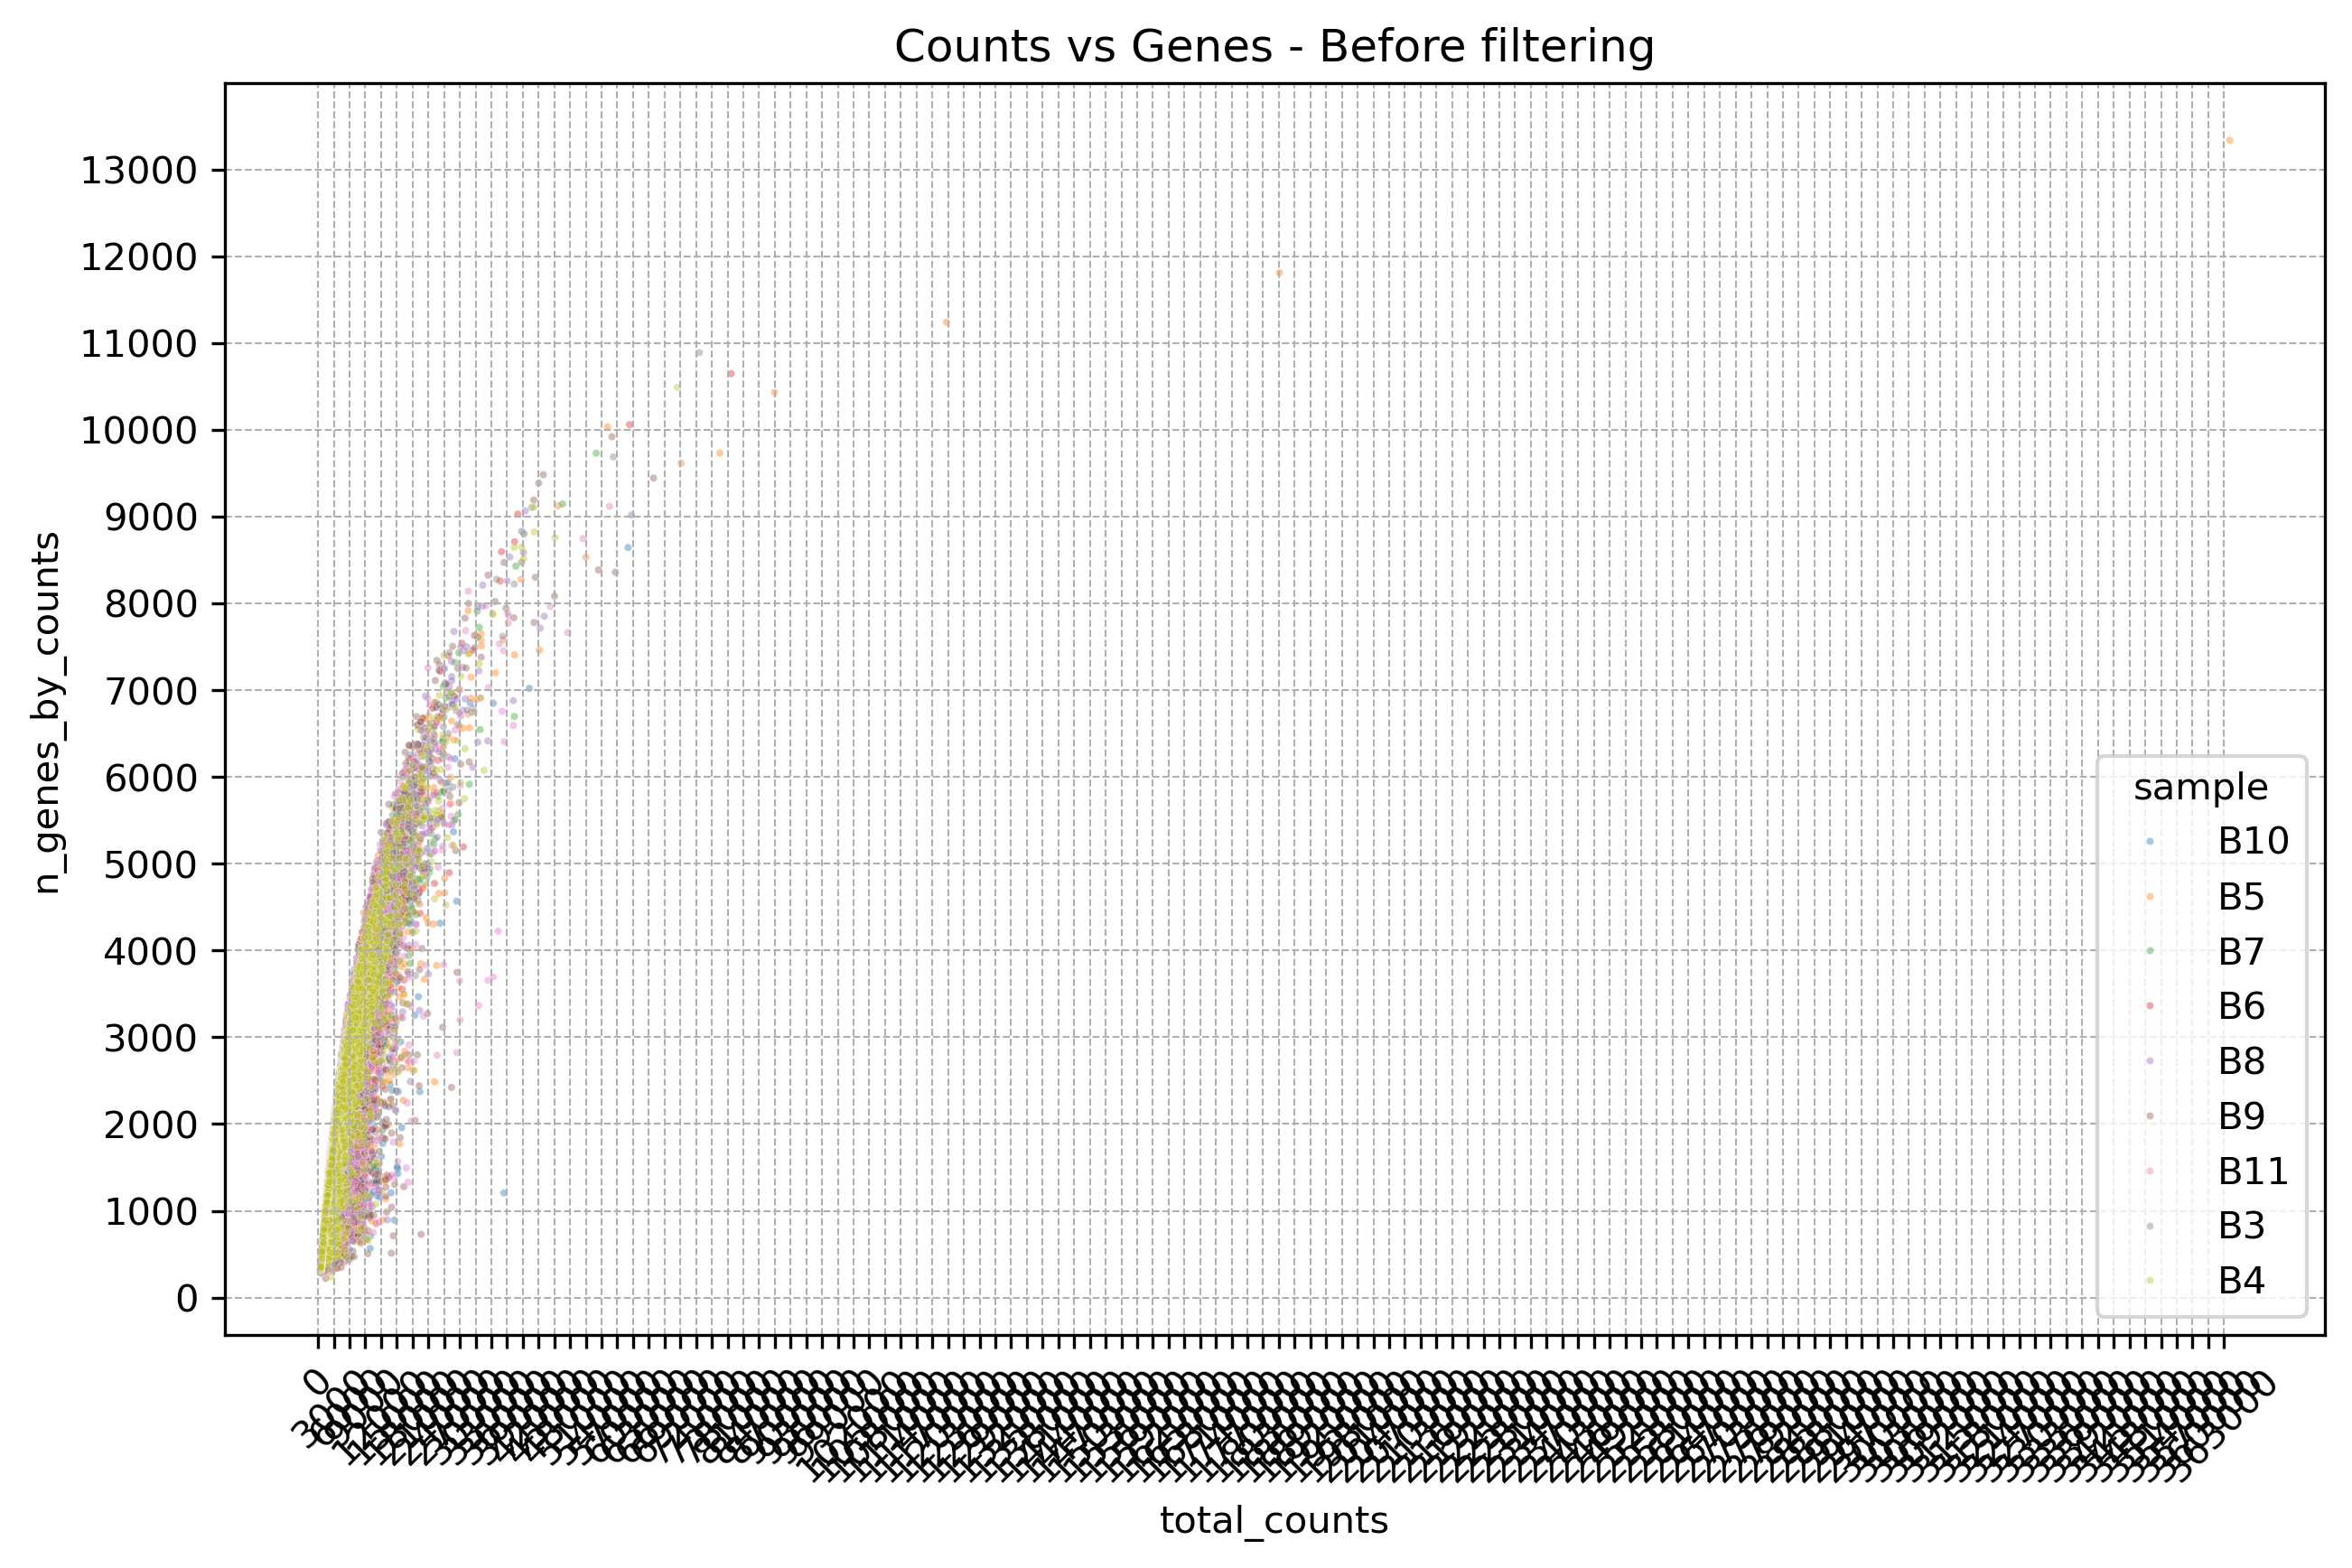

In [10]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=adata.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4, hue = 'sample')
plt.xticks(range(0, int(max(adata.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(adata.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

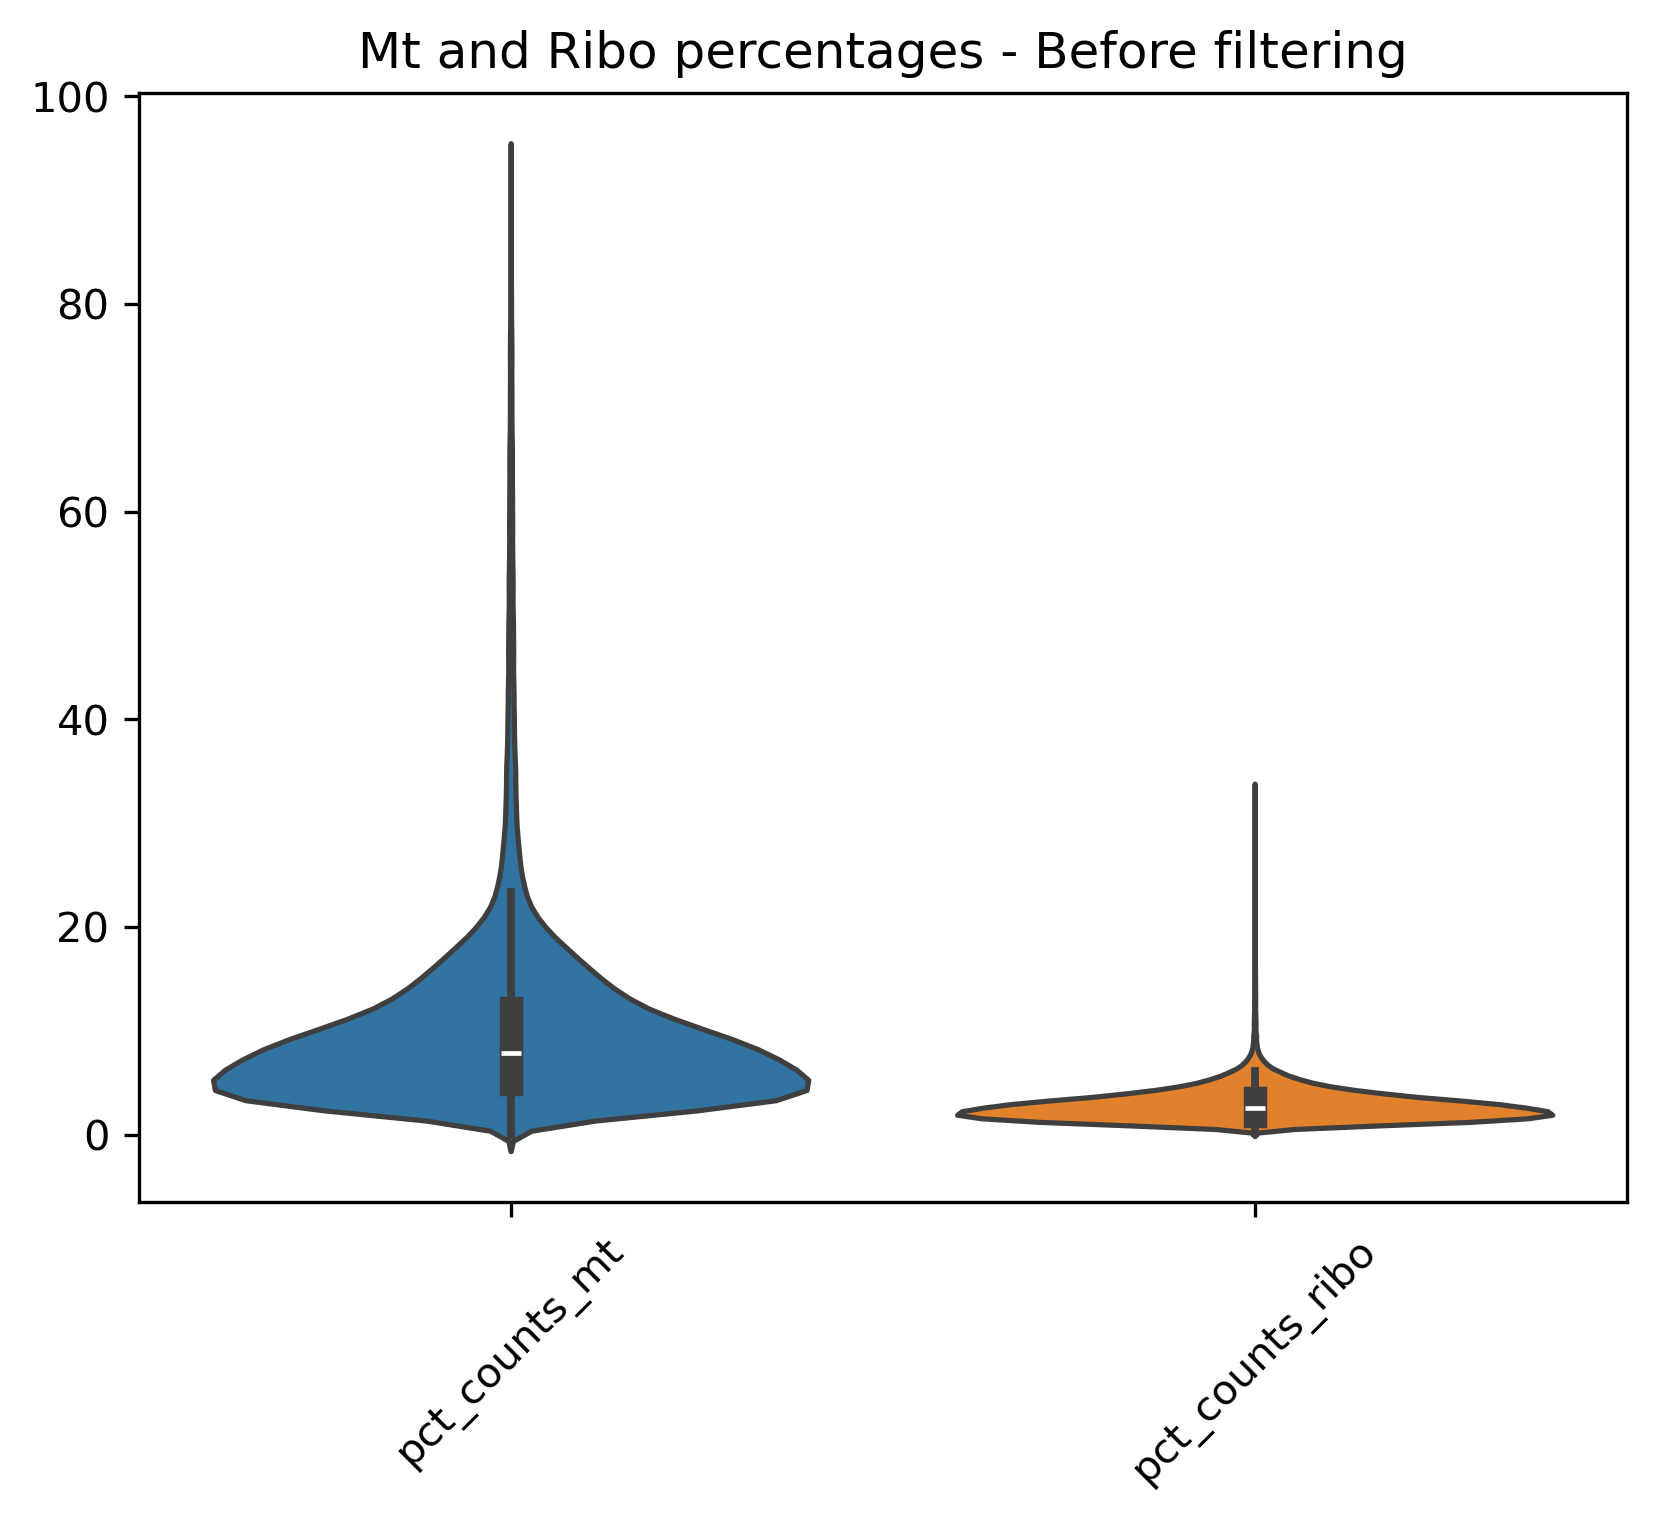

In [11]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=adata.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


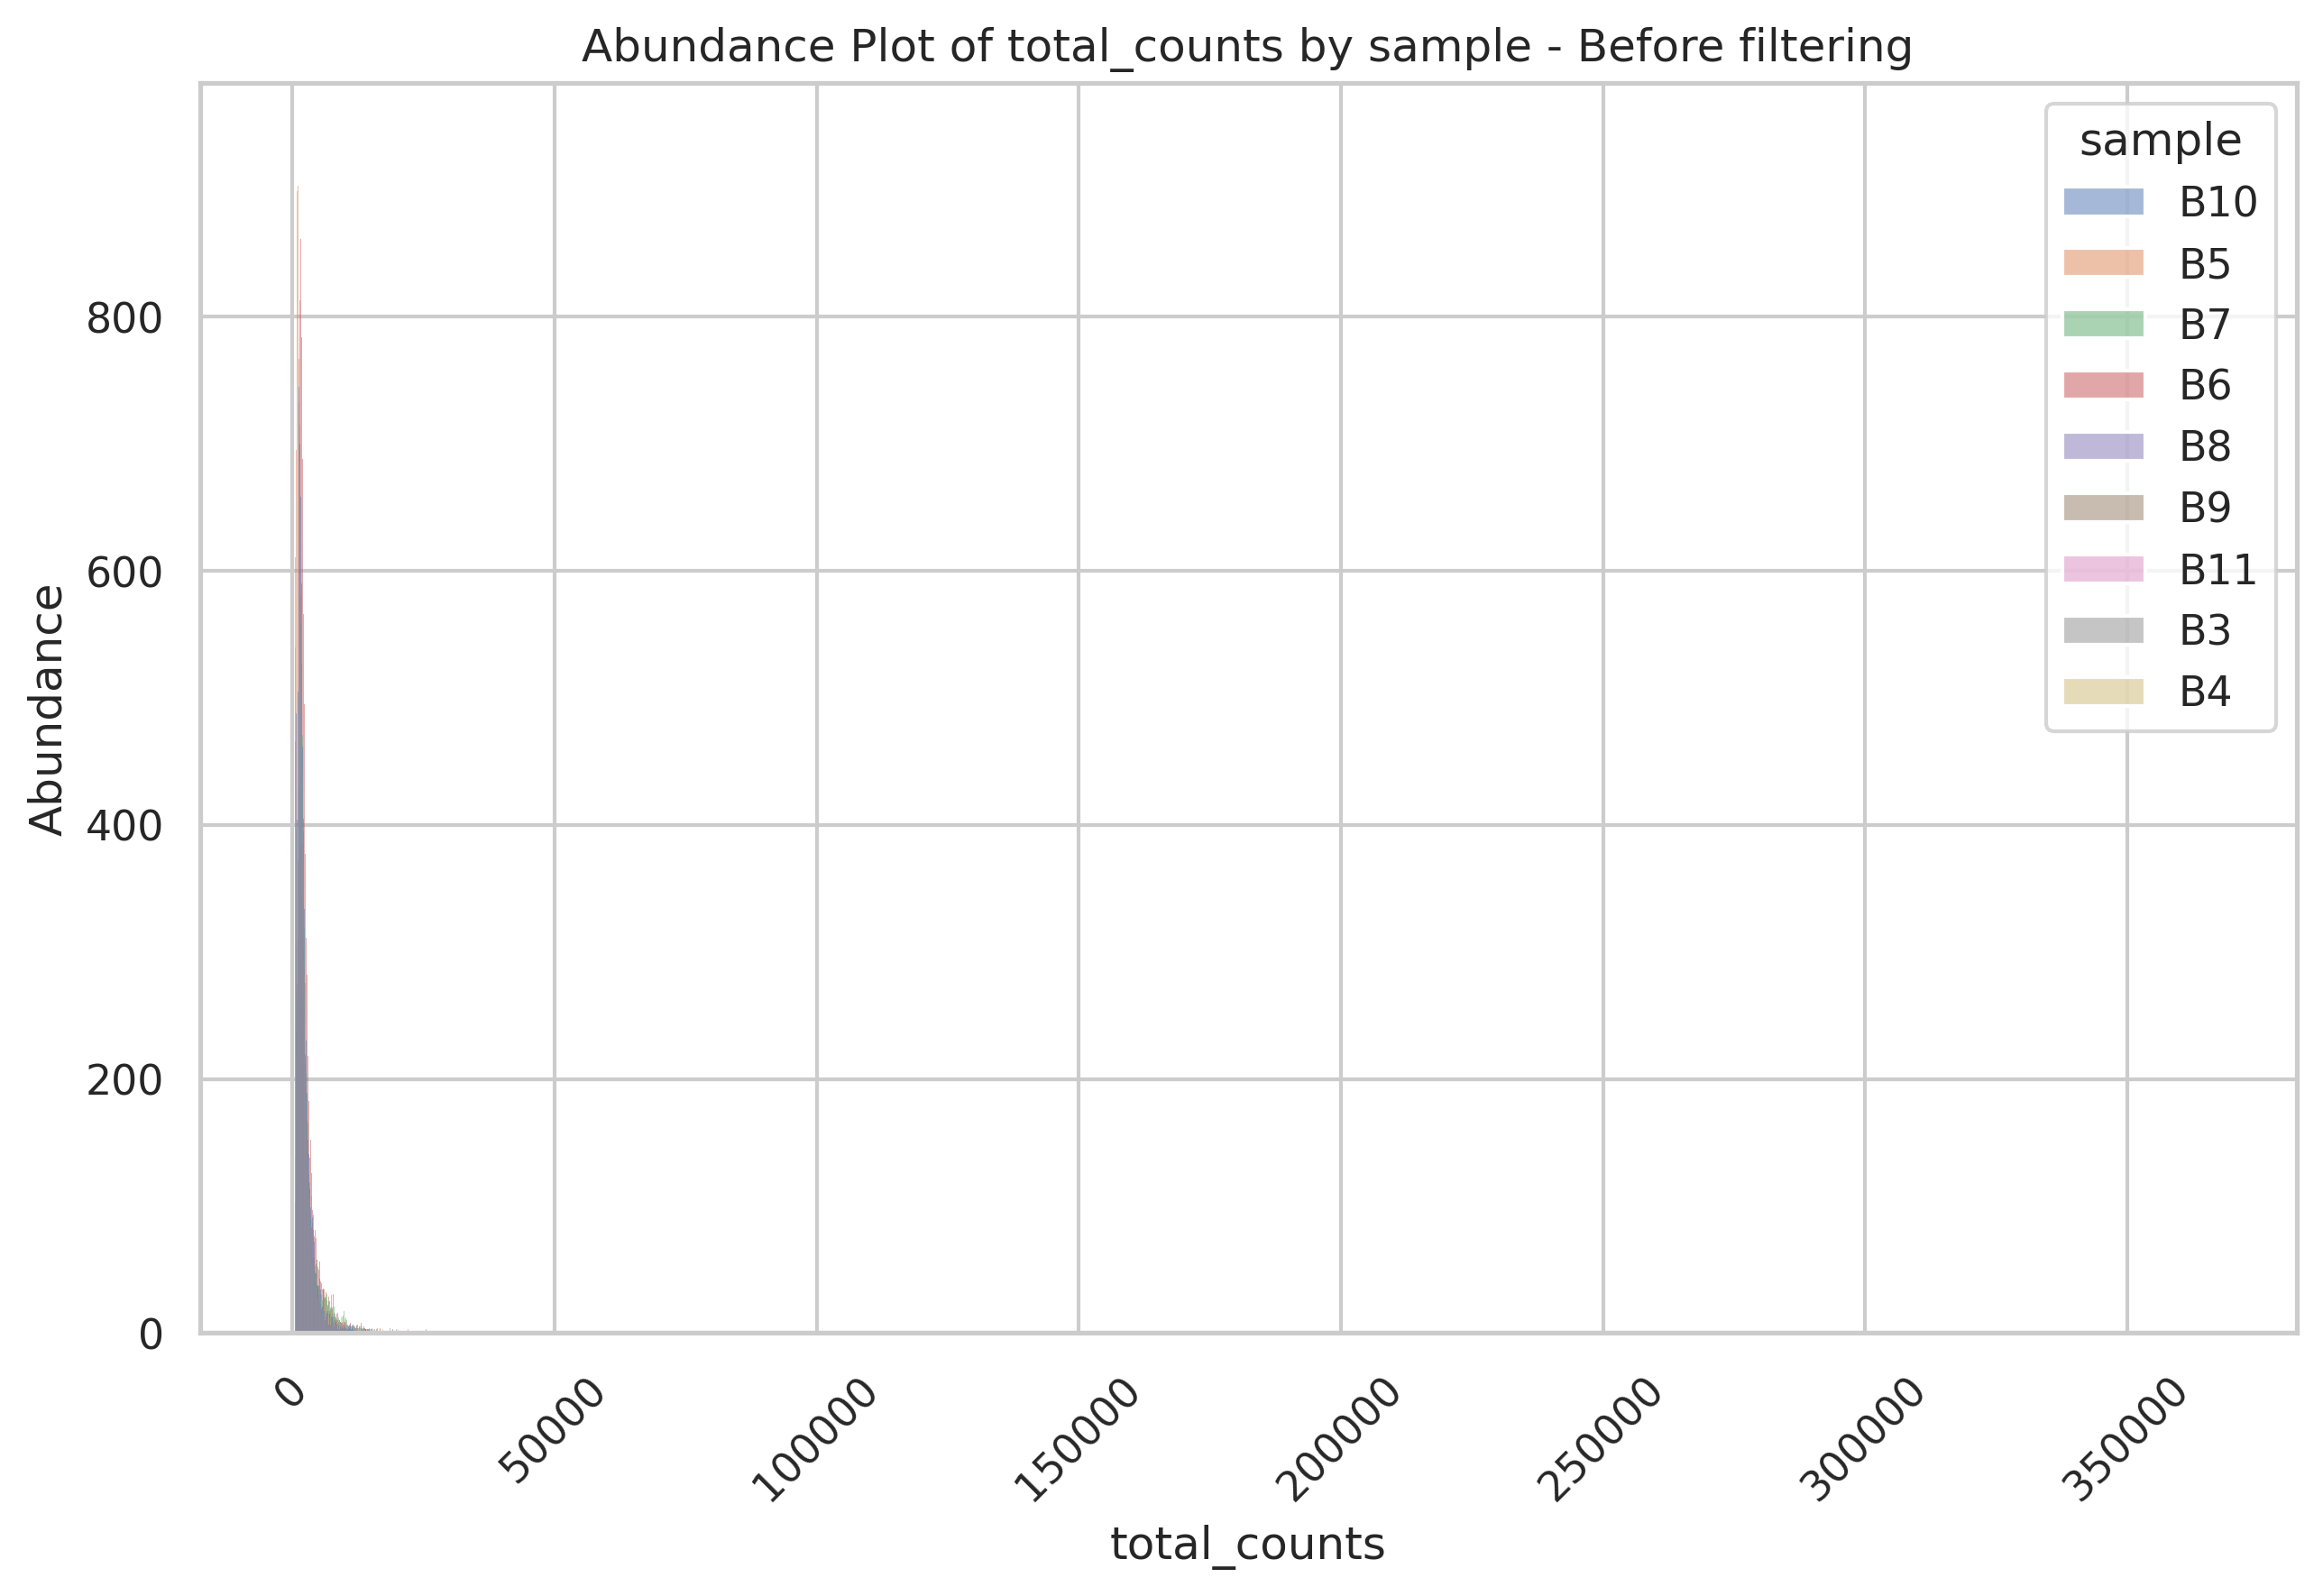

In [12]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'total_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = adata.obs, x = covariate_to_visualize, hue = 'sample', stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.xticks(rotation = 45)
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample - Before filtering')
plt.show()

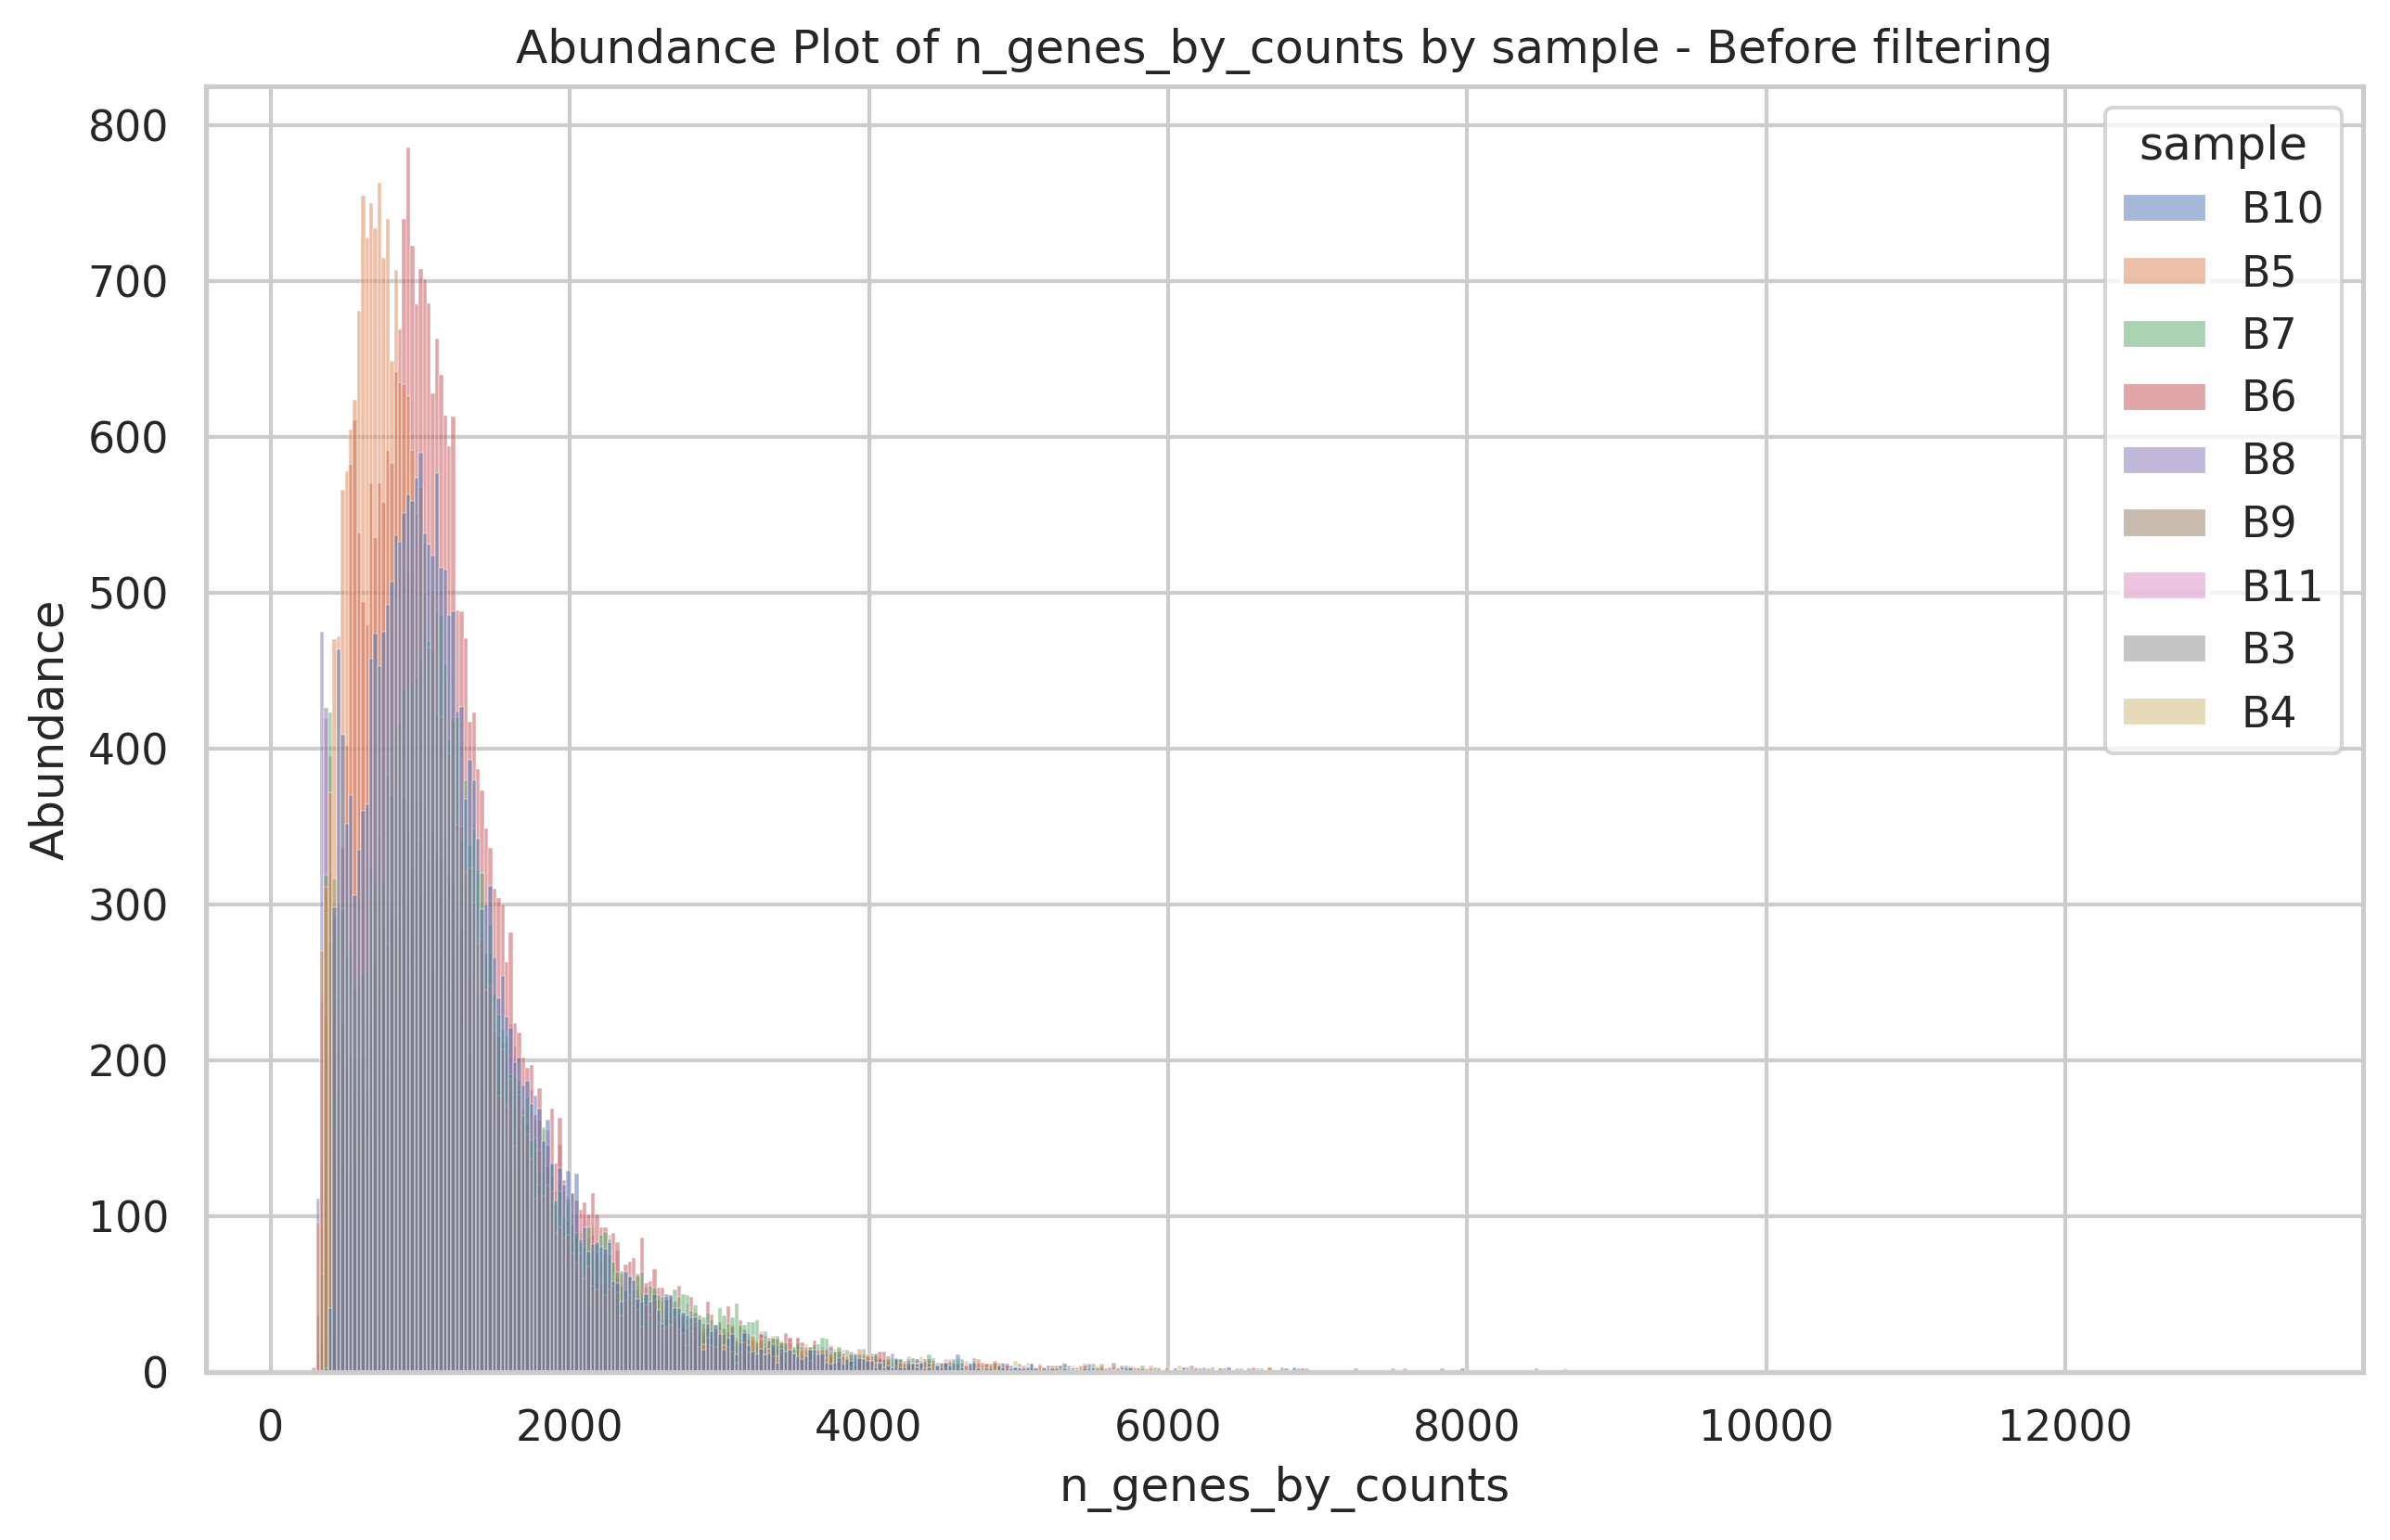

In [13]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'n_genes_by_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = adata.obs, x = covariate_to_visualize, hue = 'sample', stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample - Before filtering')
plt.show()

# UMI plot per cell for sample

#### Steps followed for graph setup

1. Make a variable to store sample names
2. Set num of rows and columns for representation
3. Create a single figure with multiple panels arranged in a grid
4. Flatten the axes array to make it easier to iterate
5. Define a color palette for the lines

#### Steps followed for graph

1. Make a loop through each sample and generate the UMI count plot in a separate panel
2. Making a copy of anndata which is unique to each sample
3. Select umi counts and sort cells by UMI counts in descending order
4. Generate the UMI count plot in the panel created
5. Continues till the graph is generated for all samples
6. Add the graph in the panel and save

/tmp/ipykernel_1800648/1323909958.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette = plt.cm.get_cmap('tab10')


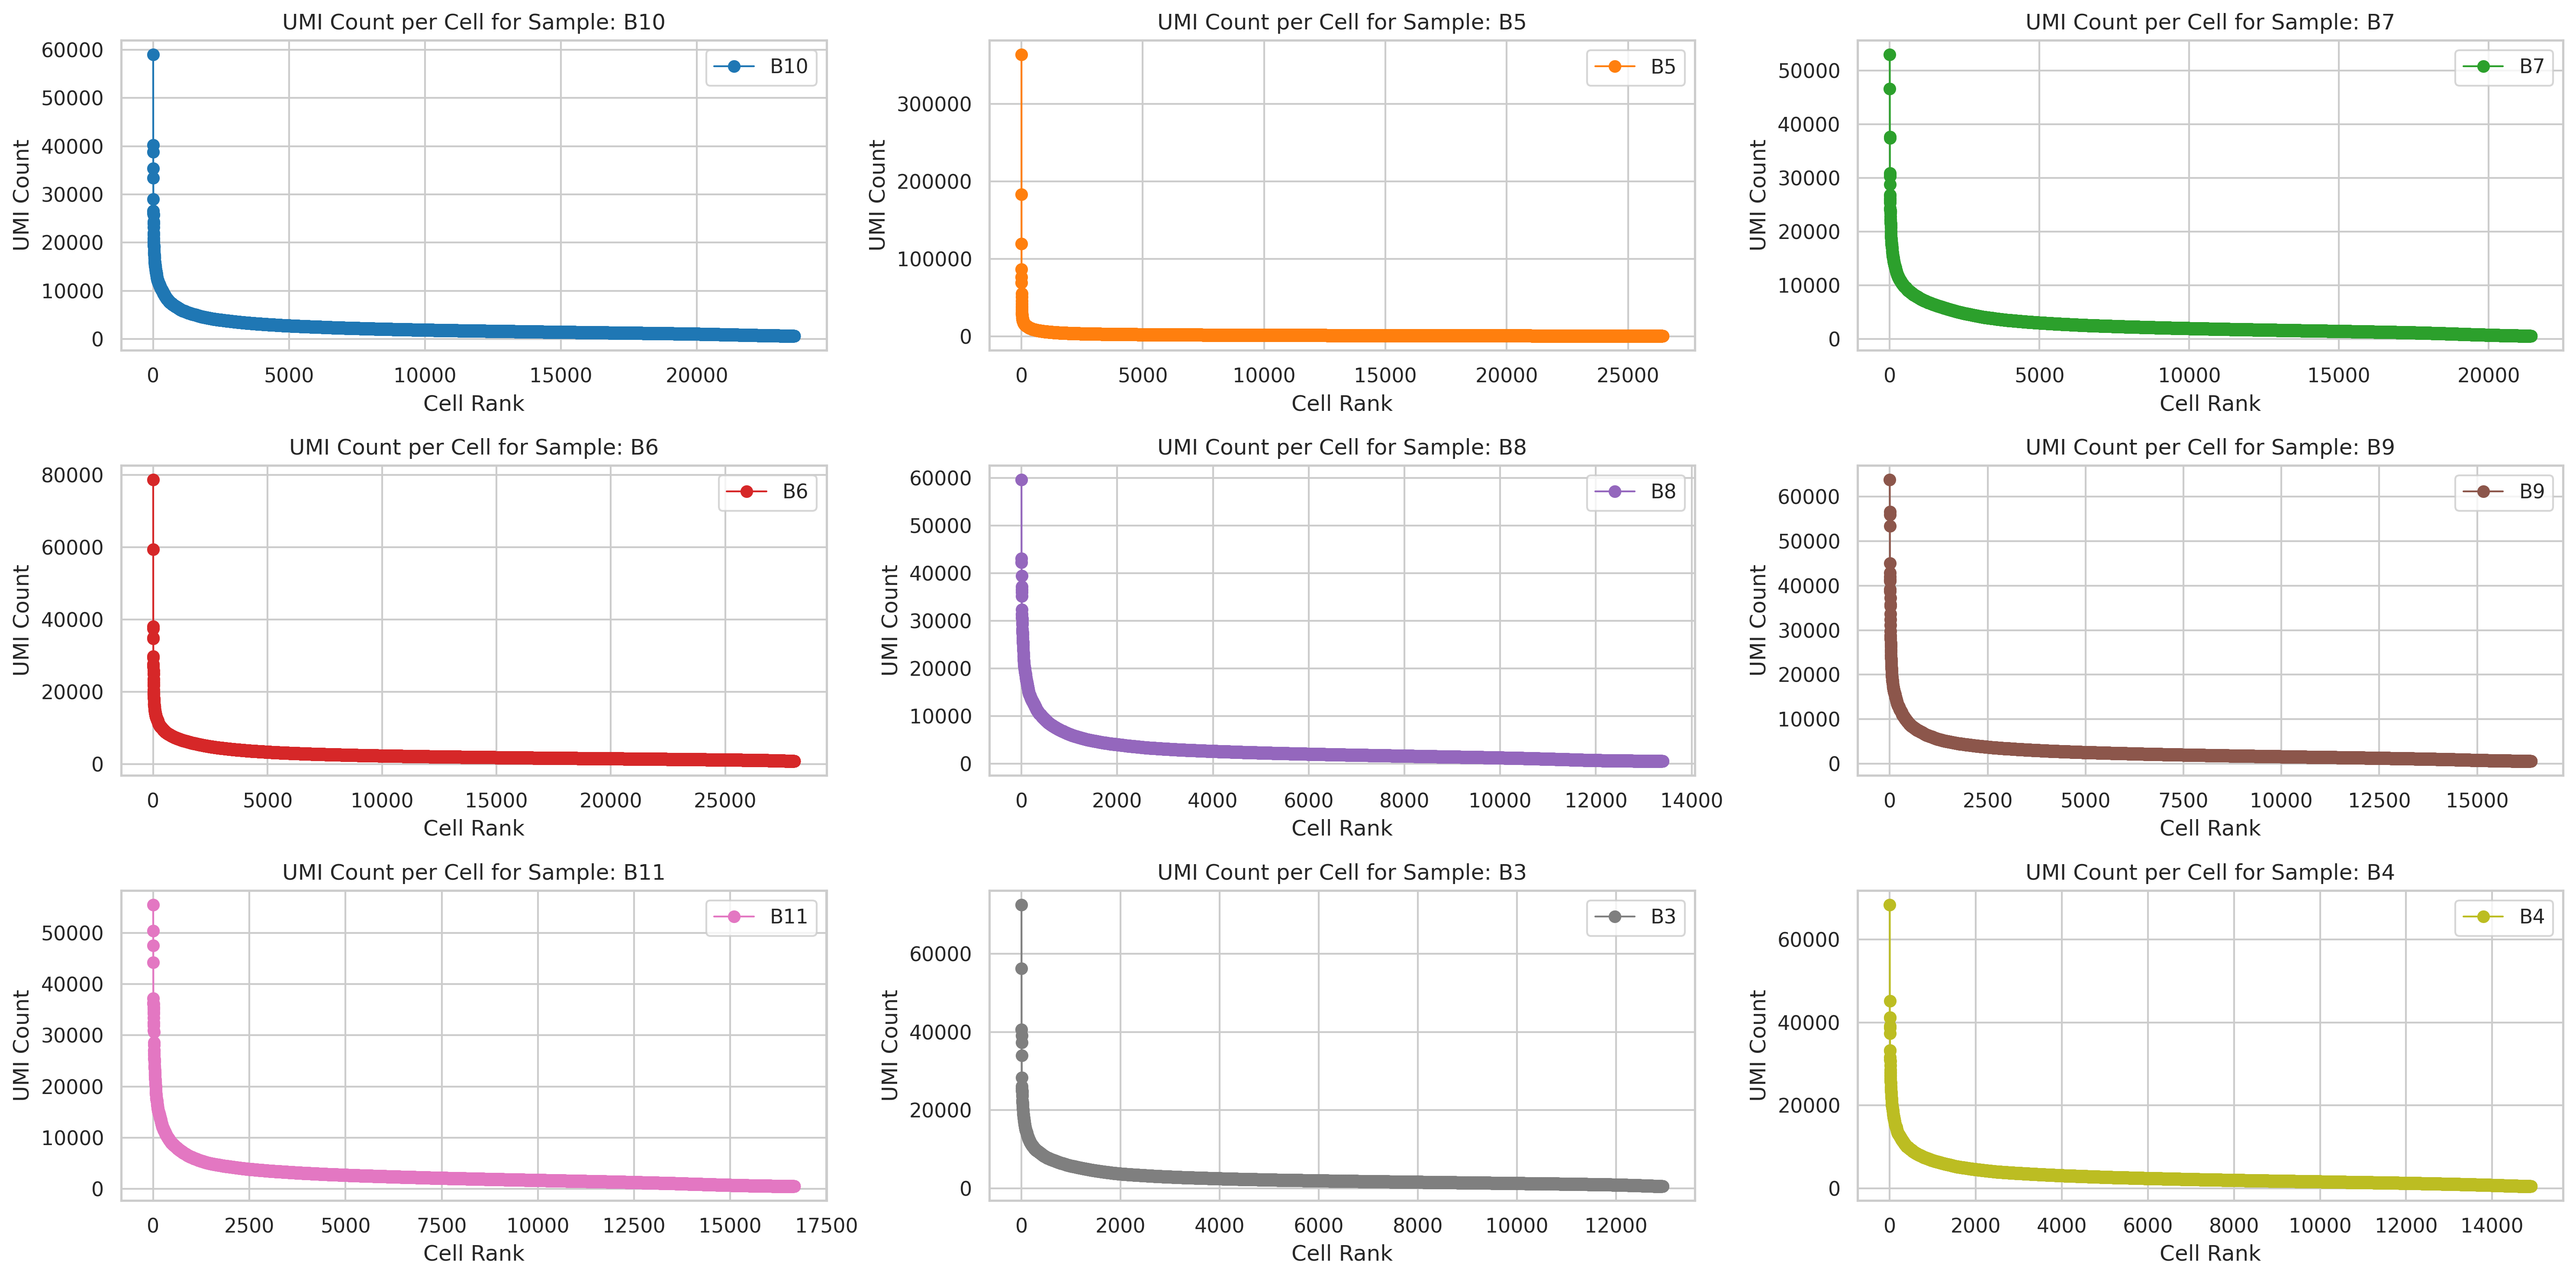

In [14]:
sample_names = adata.obs['sample'].unique()

num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axs = axs.flatten()

color_palette = plt.cm.get_cmap('tab10')

for idx, sample_name in enumerate(sample_names):
   
    mask = adata.obs['sample'] == sample_name
    sample_adata = adata[mask].copy()

    sample_adata.obs['umi_counts'] = sample_adata.X.sum(axis=1)
    sample_adata = sample_adata[sample_adata.obs['umi_counts'].argsort()[::-1]]

    ax = axs[idx]
    color = color_palette(idx)
    ax.plot(range(1, len(sample_adata) + 1), sample_adata.obs['umi_counts'], marker='o', linestyle='-', label=sample_name, color=color, linewidth=1)
    ax.set_xlabel('Cell Rank')
    ax.set_ylabel('UMI Count')
    ax.set_title(f'UMI Count per Cell for Sample: {sample_name}')
    ax.legend()

plt.tight_layout()

plt.show()


##### *Description of UMI plots*
**X-axis (Cell Rank)**: This axis represents the rank of each cell in the dataset based on its UMI count. Cells are sorted from highest to lowest UMI counts, so the cell with the highest UMI count has the lowest rank and the cell with the lowest UMI count has the highest rank.

**Y-axis (UMI Count)**: This axis represents the number of Unique Molecular Identifiers (UMIs) detected in each cell. The UMI count indicates the level of gene expression or the amount of RNA present in each cell.

**Line Plot**: Each line in the plot represents a sample, and it shows how the UMI count changes as you move from the cell with the highest UMI count (lowest rank) to the cell with the lowest UMI count (highest rank) within that sample.


**Interpretation**:
A steep increase in the line indicates that there are a few cells with very high UMI counts, which contribute to the high UMI count for that sample.
A flat or gradually increasing line indicates that the UMI counts are distributed more evenly across cells in the sample.

# Data Export

In [15]:
adata.raw = adata.copy()

adata.layers['raw_counts'] = adata.X.copy()

adata

/home/gruengroup/srivalli/miniconda3/envs/scanpy/lib/python3.13/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 173725 × 32285
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'raw_counts'

In [16]:
adata.write(f'./data/acm_raw_basic_qc_{timestamp}.h5ad')